# Regression on Uber Ride Prices
    -predict the price of the uber ride from a given pickup point to the agreed drop-off location.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## loading the dataset

In [10]:
df = pd.read_csv("./uber.csv")
print(df.head()) # checking intially what columns we have
print(df.shape) # meaning we are having 200000 rows and 9 columns

   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

Top features correlated with fare_amount
fare_amount          1.000000
dropoff_latitude     0.011014
pickup_longitude     0.010457
passenger_count      0.010150
dropoff_longitude    0.008986
pickup_latitude      0.008481
Unnamed: 0           0.000589
Name: fare_amount, dtype: float64


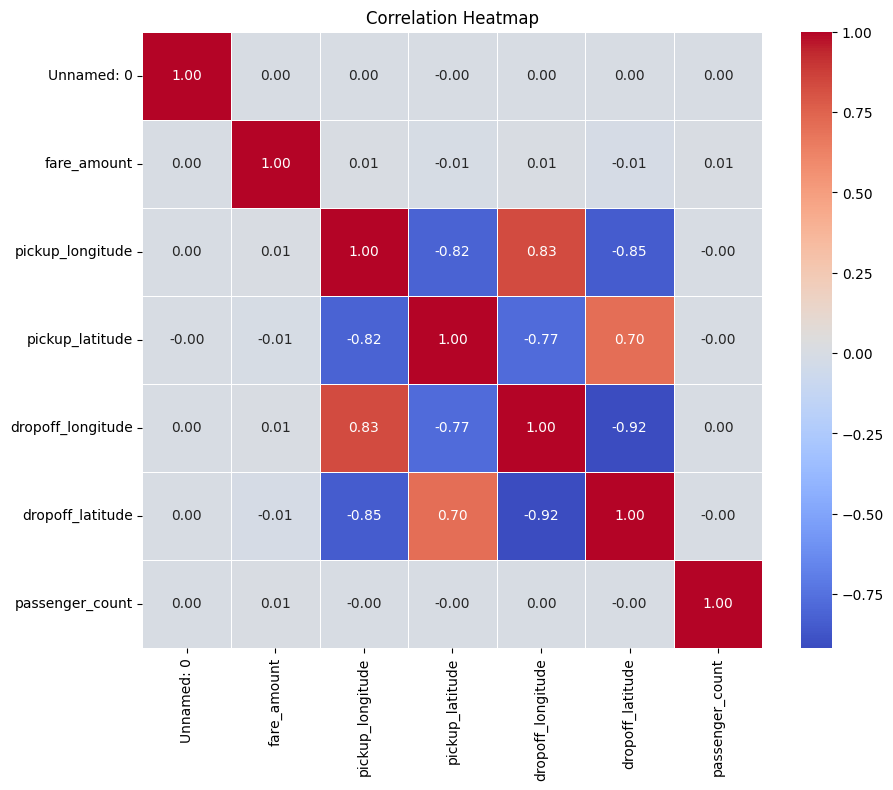

In [11]:
target_variable = 'fare_amount'

# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the absolute correlation coefficients with the target variable
correlations = numeric_columns.corr()[target_variable].abs().sort_values(ascending=False)

# Print the features with the highest correlations
print("Top features correlated with", target_variable)
print(correlations)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## preprocessing the data

In [12]:
# Handle missing values if any
df.dropna(inplace=True)

# Convert pickup_datetime to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Split the data into features (X) and target variable (y)
X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = df['fare_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Define a function to find outliers using IQR
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Specify columns where you want to find outliers
columns_to_check_for_outliers = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

# Find outliers for each specified column
for column in columns_to_check_for_outliers:
    outliers = find_outliers_iqr(df[column])
    print(f"Outliers in {column}:")
    print(df[outliers])


Outliers in fare_amount:
        Unnamed: 0                            key  fare_amount  \
6         48725865    2014-10-12 07:04:00.0000002        24.50   
30        31945670   2011-05-21 09:00:00.00000031        25.70   
34        19277743  2014-06-04 06:49:00.000000102        39.50   
39        38703737  2014-02-13 17:57:00.000000102        29.00   
48        22405517    2013-01-03 22:24:41.0000002        56.80   
...            ...                            ...          ...   
199976     1780041  2011-10-18 23:53:00.000000145        49.70   
199977    21117828    2012-11-20 21:04:30.0000001        43.50   
199982    13096190    2014-08-06 11:06:06.0000001        57.33   
199985    25830754    2015-04-18 15:16:06.0000005        24.00   
199997    27804658   2009-06-29 00:42:00.00000078        30.90   

                 pickup_datetime  pickup_longitude  pickup_latitude  \
6      2014-10-12 07:04:00+00:00        -73.961447        40.693965   
30     2011-05-21 09:00:00+00:00        

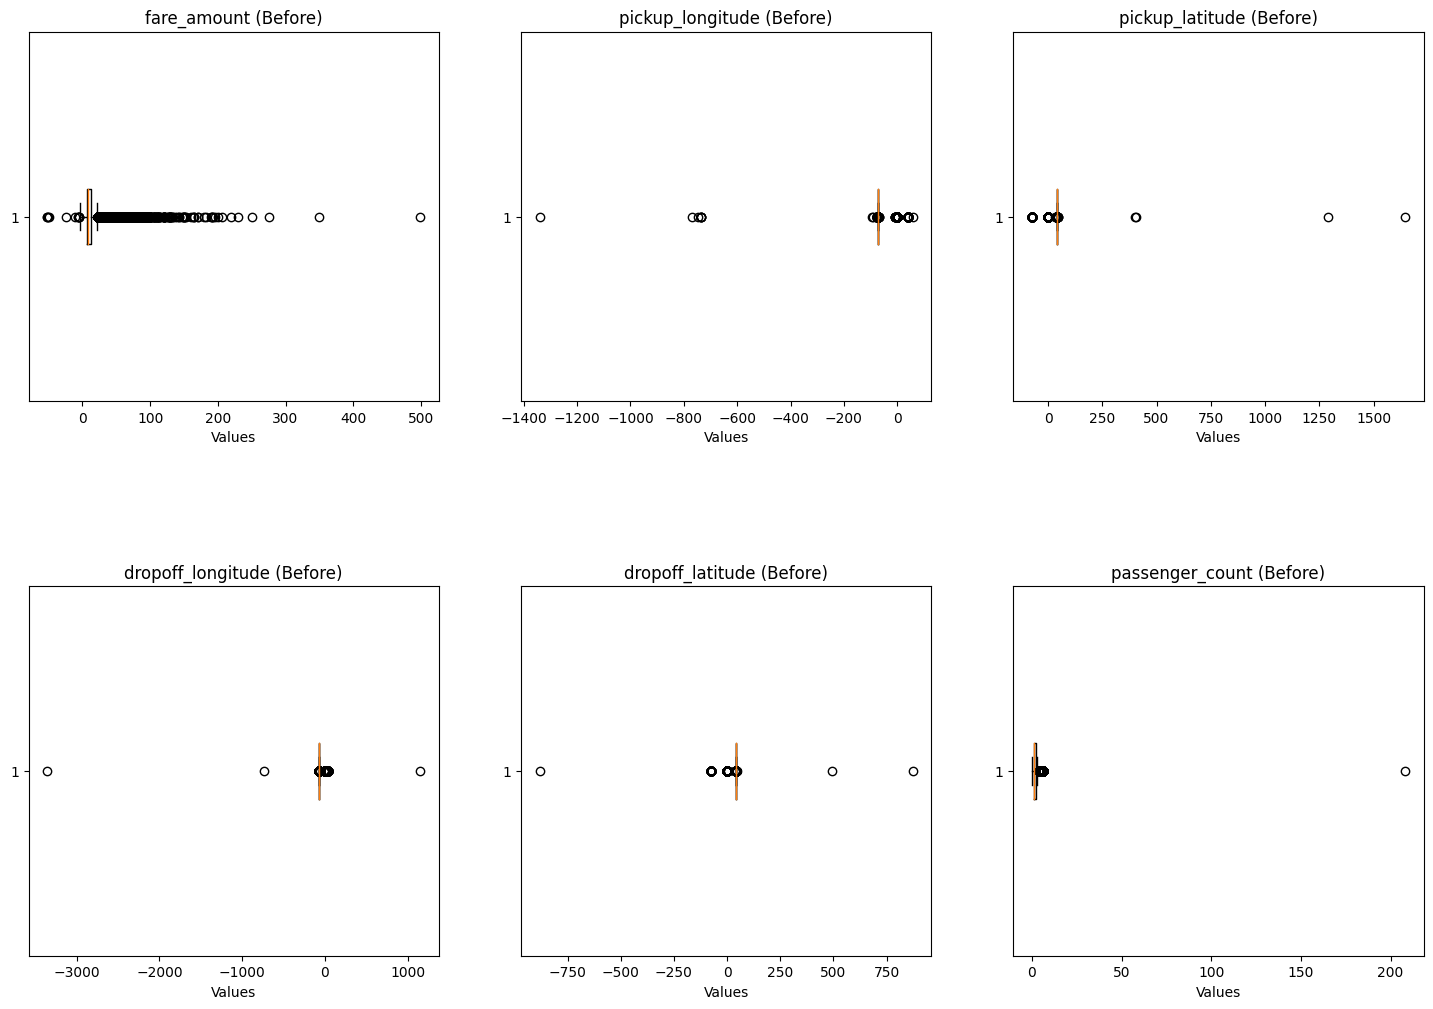

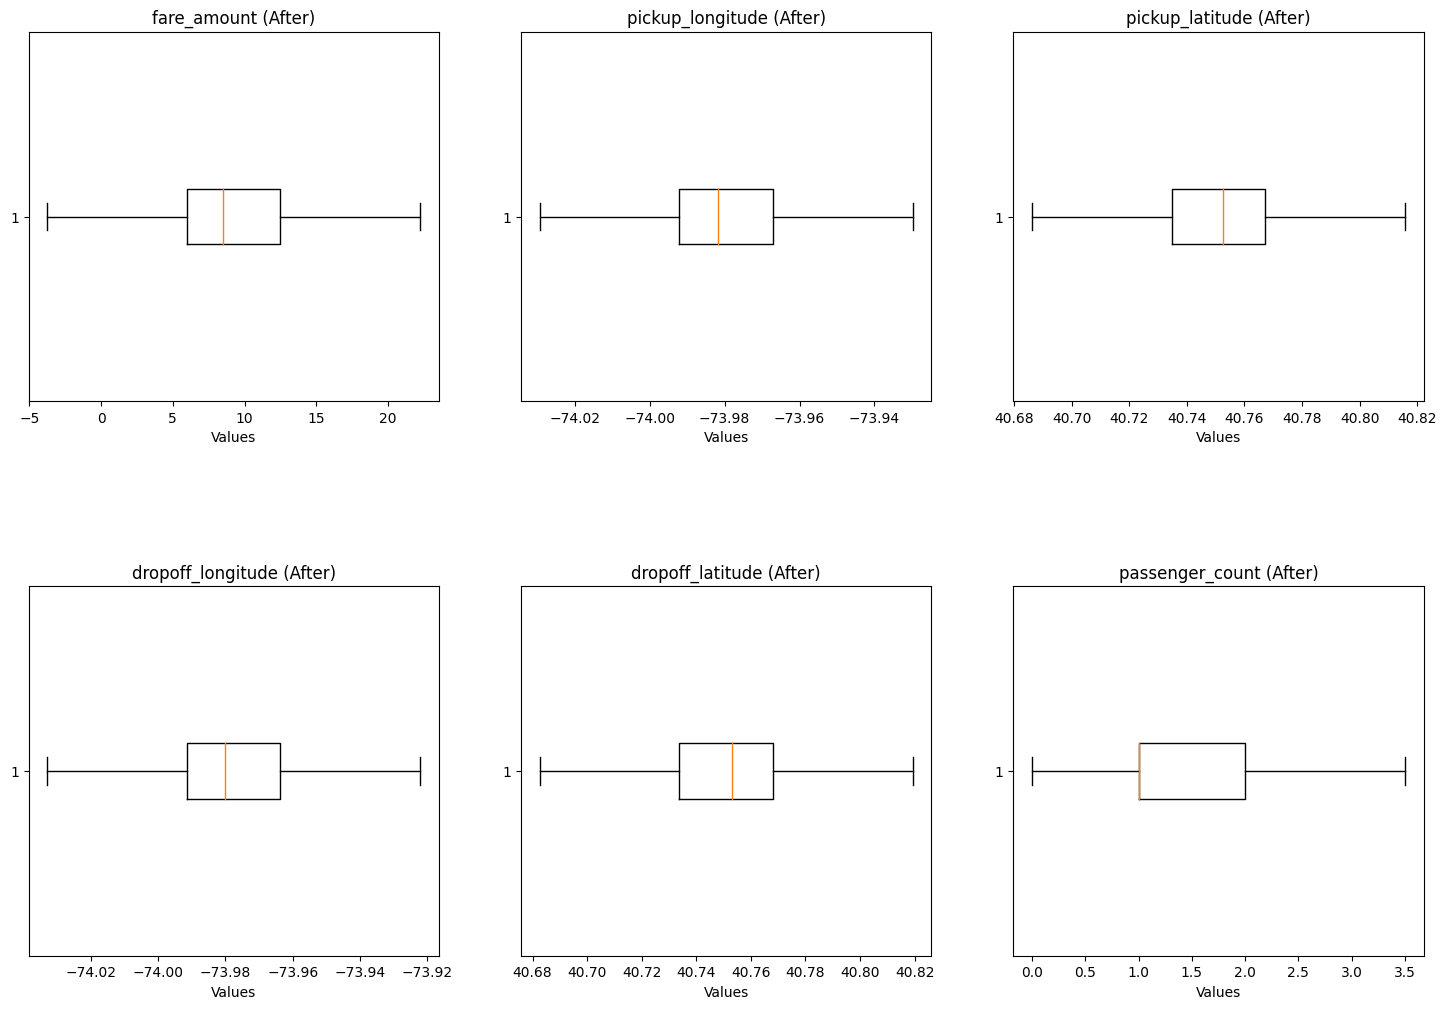

In [14]:
columns_to_check = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


# Create subplots for each column before and after handling outliers
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_to_check):
    ax = axes[i // 3, i % 3]

    # Create a subplot for "Before" handling outliers
    ax.boxplot(df[column], vert=False)
    ax.set_title(f'{column} (Before)')
    ax.set_xlabel('Values')
    ax.set_ylabel('')

# Handle outliers here (e.g., impute or remove)
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with upper and lower bounds
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return data

# Specify columns with outliers
columns_with_outliers = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

# Handle outliers for each specified column
for column in columns_with_outliers:
    df = handle_outliers_iqr(df, column)


# Create subplots again for each column "After" handling outliers
fig2, axes2 = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig2.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_to_check):
    ax = axes2[i // 3, i % 3]

    # Create a subplot for "After" handling outliers
    ax.boxplot(df[column], vert=False)
    ax.set_title(f'{column} (After)')
    ax.set_xlabel('Values')
    ax.set_ylabel('')

plt.show()

In [15]:
# Calculate the correlation matrix, excluding non-numeric columns
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Display the correlation with respect to the target variable (fare_amount)
print(correlation_matrix['fare_amount'].sort_values(ascending=False))

fare_amount          1.000000
dropoff_longitude    0.218681
pickup_longitude     0.154053
passenger_count      0.015798
Unnamed: 0           0.000428
pickup_latitude     -0.110857
dropoff_latitude    -0.125874
Name: fare_amount, dtype: float64


In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Create and fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Create and fit the Ridge Regression model
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X_train, y_train)

# Create and fit the Lasso Regression model
lasso_reg = Lasso(alpha=0.4)
lasso_reg.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)


In [17]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    print(f"{model_name} - R2 Score: {r2:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}")

evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")


# having really bad evaluation Please FIX :)

Linear Regression - R2 Score: 0.000, MSE: 103.988, RMSE: 10.197
Ridge Regression - R2 Score: 0.000, MSE: 103.988, RMSE: 10.197
Lasso Regression - R2 Score: 0.000, MSE: 104.011, RMSE: 10.199
